# Douglas González Parra, grupo 01

# Tarea 4 modelos probabilisticos de señales y sistemas ie0405

# Situación 

En el archivo bits10k.csv se encuentran 10.000 bits (actualizado) generados a partir de una fuente binaria equiprobable. El objetivo es hacer una modulación digital para "transmitir" estos datos por un canal ruidoso. La modulación se hace con una frecuencia en la portadora de f=5000 Hz y con un período de símbolo igual a un período completo de la onda portadora.

In [278]:
# Douglas González Parra, grupo 01

# Tarea 4 modelos probabilisticos de señales y sistemas ie0405


#importando bibliotecas necesarias
import numpy as np
from scipy import stats
from scipy import signal
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd


# cargando bits en bits10k.csv
bits10k=pd.read_csv('bits10k.csv',header=None)
N = len(bits10k) # cantidad de bits 

# Almacena los bits cargados en el dataframe bits10k
# en un array numpy
newbits10k=np.zeros(bits10k.shape)
for i in range(0,10000):
    newbits10k[i]= bits10k.loc[i,0]

1. Crear un esquema de modulación BPSK para los bits presentados. Esto implica asignar una forma de 
onda sinusoidal normalizada (amplitud unitaria) para cada bit y luego una concatenación de todas 
estas formas de onda.

BPSK es una modulación que emplea un desplazamiento de fase binaria. Empleando dos fases de salida para una frecuencia de la portadora, donde se emplea una fase de 0 grados para indicar 1 bit y una fase de 180 grados para indicar 0 bit. 

Primeros 7 bits de la señal a transmitir
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]]


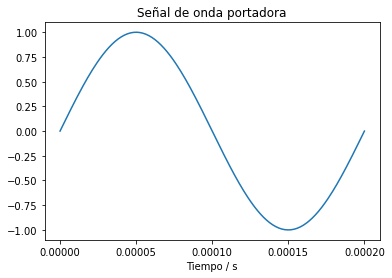

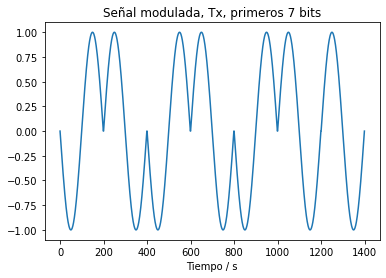

In [279]:
# 1. Crear un esquema de modulación BPSK para los bits presentados. Esto implica asignar una forma de 
# onda sinusoidal normalizada (amplitud unitaria) para cada bit y luego una concatenación de todas 
# estas formas de onda.

# Frecuencia en la portadora de f0 = 5000 Hz
fp=5000

# Periodo de simbolo
Ts = 1/fp # 0.2 ms

# Cantidad de puntos de muestreo por periodo
mp = 200

# Puntos de muestreo para cada periodo
# El periodo es 0.2 ms, toma una muestra cada 1 µs
tp = np.linspace(0,Ts,mp) 

# Forma de onda de la portadora
portadora = np.sin(2*np.pi*fp*tp)

# Grafica de la señal de onda de la portadora
plt.plot(tp, portadora)
plt.title('Señal de onda portadora')
plt.xlabel('Tiempo / s')
plt.xticks(np.arange(min(tp), max(tp)+0.00005, 0.00005))
plt.savefig('img/portadora.png')

# Frecuencia de muestreo
fs = mp/Ts # 1 MHz

# Linea temporal para toda la señal de transmicion Tx
t = np.linspace(0, N*Ts, N*mp)

# Inicializar señal modulada
modulada = np.zeros(t.shape)


# Señal modulada 
for i in range(0,9999): 
    if bits10k.loc[i,0] == 1:
        modulada[i*mp:(i+1)*mp] = portadora
    else:
        modulada[i*mp:(i+1)*mp] = -portadora
    
# Visualización de los primeros 7 bits modulados
pb = 7
plt.figure()
plt.plot(modulada[0:pb*mp]) 
plt.title('Señal modulada, Tx, primeros 7 bits')
plt.xlabel('Tiempo / s')
plt.savefig('img/Tx.png')

# Imprime primeros 7 bits a transmitir
print('Primeros 7 bits de la señal a transmitir')
print(newbits10k[0:7])

2. Calcular la potencia promedio de la señal modulada generada.

La potencia promedio en una función periódica es la integral de la función de potencia de 
tiempo durante un periodo completo, dividido entre el periodo, en unidades de Watts

In [280]:
# 2. Calcular la potencia promedio de la señal modulada generada.

# Potencia instantánea
Pinst = modulada**2

# Potencia promedio (W) de la señal
Ps = integrate.trapz(Pinst, t) / (N*Ts)

a_float = Ps
formatted_float = "{:.4f}".format(a_float)

print('La potencia promedio de la señal modulada es: ', formatted_float, '[W]')

La potencia promedio de la señal modulada es:  0.4975 [W]


3. Simular un canal ruidoso del tipo AWGN (ruido aditivo blanco gaussiano) con una relación señal a ruido (SNR) desde -2 hasta 3 dB.

Se solicita una relación de SNR desde -2 hasta 3 dB, -2 db sería el peor caso tomando ese intervalo, entre menor es el SNR, mas ruido posee la señal,
se útiliza un SNR de -2 para simular un peor caso.

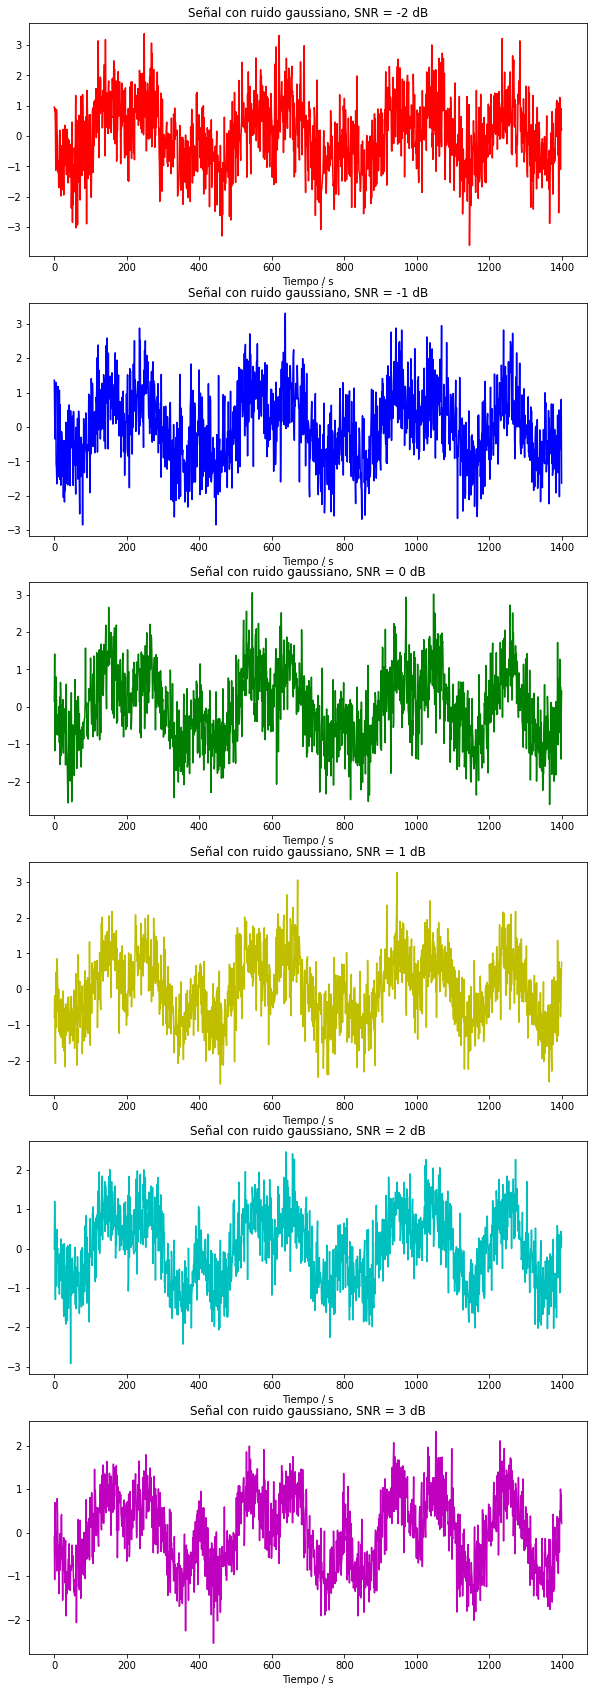

In [281]:
# 3.Simular un canal ruidoso del tipo AWGN (ruido aditivo blanco gaussiano) con una relación señal a ruido (SNR) desde -2 hasta 3 dB.

# Relación señal-a-ruido deseada
SNR_2 = -2 # -2 dB
SNR_1 = -1 # -1 dB
SNR0 = 0   # 0 dB
SNR1 = 1   # 1 dB
SNR2 = 2   # 2 dB
SNR3 = 3   # 3 dB

# Potencia del ruido para SNR y la potencia de la señal dadas
Pn_2 = Ps / (10**(SNR_2 / 10)) # -2 dB
Pn_1 = Ps / (10**(SNR_1 / 10)) # -1 dB
Pn0 = Ps / (10**(SNR0 / 10))   # 0 dB
Pn1 = Ps / (10**(SNR1 / 10))   # 1 dB
Pn2 = Ps / (10**(SNR2 / 10))   # 2 dB
Pn3 = Ps / (10**(SNR3 / 10))   # 3 dB

# Desviación estándar del ruido
sigma_2 = np.sqrt(Pn_2) # -2 dB
sigma_1 = np.sqrt(Pn_1) # -1 dB
sigma0 = np.sqrt(Pn0)   # 0 dB
sigma1 = np.sqrt(Pn1)   # 1 dB
sigma2 = np.sqrt(Pn2)   # 2 dB
sigma3 = np.sqrt(Pn3)   # 3 dB

# Crea ruido (Pn = sigma^2)
ruido_2 = np.random.normal(0, sigma_2, modulada.shape)
ruido_1 = np.random.normal(0, sigma_1, modulada.shape)
ruido0 = np.random.normal(0, sigma0, modulada.shape)
ruido1 = np.random.normal(0, sigma1, modulada.shape)
ruido2 = np.random.normal(0, sigma2, modulada.shape)
ruido3 = np.random.normal(0, sigma3, modulada.shape)

# Simular "el canal": señal recibida
Rx_2 = modulada + ruido_2 # -2 dB
Rx_1 = modulada + ruido_1 # -1 dB
Rx0 = modulada + ruido0   # 0 dB
Rx1 = modulada + ruido1   # 1 dB
Rx2 = modulada + ruido2   # 2 dB
Rx3 = modulada + ruido3   # 3 dB


# Grafica señal con ruido
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6, ncols=1, figsize=(10,30))

ax0.plot(Rx_2[0:pb*mp], 'r')
ax0.set_xlabel('Tiempo / s')
ax0.set_title('Señal con ruido gaussiano, SNR = -2 dB');

ax1.plot(Rx_1[0:pb*mp], 'b')
ax1.set_xlabel('Tiempo / s')
ax1.set_title('Señal con ruido gaussiano, SNR = -1 dB');

ax2.plot(Rx0[0:pb*mp], 'g')
ax2.set_xlabel('Tiempo / s')
ax2.set_title('Señal con ruido gaussiano, SNR = 0 dB');

ax3.plot(Rx1[0:pb*mp], 'y')
ax3.set_xlabel('Tiempo / s')
ax3.set_title('Señal con ruido gaussiano, SNR = 1 dB');

ax4.plot(Rx2[0:pb*mp], 'c')
ax4.set_xlabel('Tiempo / s')
ax4.set_title('Señal con ruido gaussiano, SNR = 2 dB');

ax5.plot(Rx3[0:pb*mp], 'm')
ax5.set_xlabel('Tiempo / s')
ax5.set_title('Señal con ruido gaussiano, SNR = 3 dB');

plt.savefig('img/senal_ruido.png')

4. Graficar la densidad espectral de potencia de la señal con el método de Welch (SciPy), antes y después del canal ruidoso.

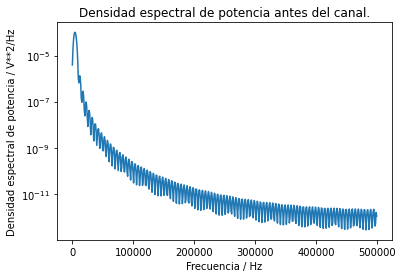

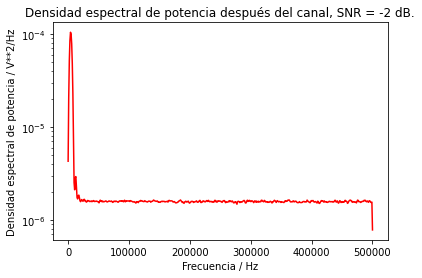

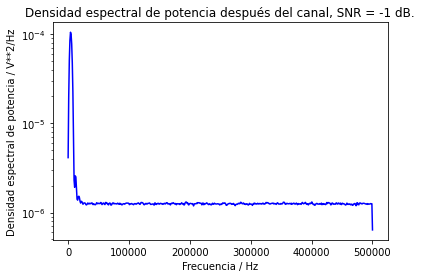

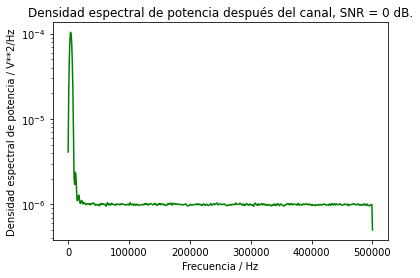

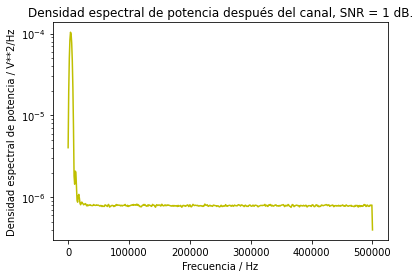

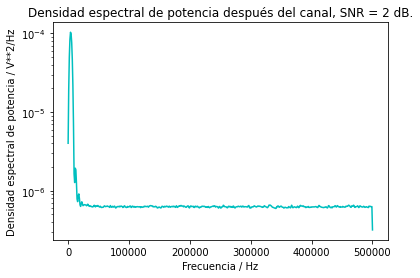

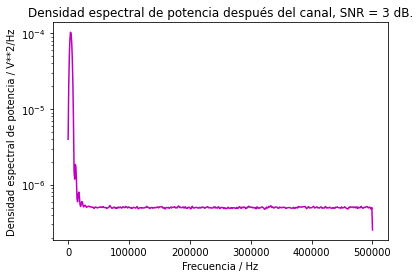

In [282]:
# 4. Graficar la densidad espectral de potencia de la señal con el método de Welch (SciPy), antes y después del canal ruidoso.

# Antes del canal con ruido
fw, PSD = signal.welch(modulada, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia antes del canal.')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('img/Densidad_potencia_antes_canal.png')
plt.show()

# Después del canal con ruido, SNR = -2 dB
fw, PSD = signal.welch(Rx_2, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD, 'r')
plt.title('Densidad espectral de potencia después del canal, SNR = -2 dB.')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('img/Densidad_potencia_despues_canal_-2dB.png')
plt.show()

# Después del canal con ruido, SNR = -1 dB
fw, PSD = signal.welch(Rx_1, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD, 'b')
plt.title('Densidad espectral de potencia después del canal, SNR = -1 dB.')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('img/Densidad_potencia_despues_canal_-1dB.png')
plt.show()

# Después del canal con ruido, SNR = 0 dB
fw, PSD = signal.welch(Rx0, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD, 'g')
plt.title('Densidad espectral de potencia después del canal, SNR = 0 dB.')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('img/Densidad_potencia_despues_canal_0dB.png')
plt.show()

# Después del canal con ruido, SNR = 1 dB
fw, PSD = signal.welch(Rx1, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD, 'y')
plt.title('Densidad espectral de potencia después del canal, SNR = 1 dB.')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('img/Densidad_potencia_despues_canal_1dB.png')
plt.show()

# Después del canal con ruido, SNR = 2 dB
fw, PSD = signal.welch(Rx2, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD, 'c')
plt.title('Densidad espectral de potencia después del canal, SNR = 2 dB.')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('img/Densidad_potencia_despues_canal_2dB.png')
plt.show()

# Después del canal con ruido, SNR = 3 dB
fw, PSD = signal.welch(Rx3, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD, 'm')
plt.title('Densidad espectral de potencia después del canal, SNR = 3 dB.')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('img/Densidad_potencia_despues_canal_3dB.png')
plt.show()

AL analizar las gráficas de densidad espectral de potencia, se puede ver como la potencia se da con mayor intensidad de forma cercano a los 5000 Hz,
y antes del canl decae de forma mas distribuida, mientras que despúes del canal se atenua mas.

5. Demodular y decodificar la señal y hacer un conteo de la tasa de error de bits (BER, bit error rate) para cada nivel SNR.

Se emplea una recuperación coherente, donde se detecta y regenera una señal de portadora que es coherente, tanto en fase como en frecuencia, con la portadora original de transmisión. 

Se calcula el producto interno de la señal Rx recibida con la función portadora, si el valor de dicho producto internor es mayor a la 
Pseudo-energía/2, se decodifica como 1, si es menor a Pseudo-energía/2 se decodifica un 0.

El error se calcula como expectativa teórica, o matemática, de que determinado sistema
tenga una tasa de errores. Es decir para una cantidad determinada de bits transmitidos, cuantos se transmiten de forma correcta.

Mientras que bit error rate (BER) o tasa de error de bits, es el error entre el total de bits que se transmiten.

In [283]:
# 5. Demodular y decodificar la señal y hacer un conteo de la tasa de error de bits (BER, bit error rate) para cada nivel SNR.

# Inicializar el array para almacenar los bits recibidos en Rx.
bitsRx_2 = np.zeros(bits10k.shape) # SNR = -2 
bitsRx_1 = np.zeros(bits10k.shape) # SNR = -1
bitsRx0 = np.zeros(bits10k.shape)  # SNR = 0
bitsRx1 = np.zeros(bits10k.shape)  # SNR = 1
bitsRx2 = np.zeros(bits10k.shape)  # SNR = 2
bitsRx3 = np.zeros(bits10k.shape)  # SNR = 3



# Pseudo-energía de la onda original
Es = np.sum(portadora**2)

# Decodificación de la señal por detección de energía, SNR = -2
for i, b in enumerate(newbits10k):
  # Se calcula el productor interno de la señal Rx recibida
  # con la función portadora, si el valor de dicho producto
  # internor es mayor a la Pseudo-energía/2, se decodifica como 1,
  # si es menor a Pseudo-energía/2 se decodifica como 0.
  Ep = np.sum(Rx_2[i*mp:(i+1)*mp] * portadora) 
  if Ep > Es/2:
    bitsRx_2[i] = 1
  else:
    bitsRx_2[i] = 0

# Decodificación de la señal por detección de energía, SNR = -1
for i, b in enumerate(newbits10k):
  Ep = np.sum(Rx_1[i*mp:(i+1)*mp] * portadora) 
  if Ep > Es/2:
    bitsRx_1[i] = 1
  else:
    bitsRx_1[i] = 0
    
# Decodificación de la señal por detección de energía, SNR = 0
for i, b in enumerate(newbits10k):
  Ep = np.sum(Rx0[i*mp:(i+1)*mp] * portadora) 
  if Ep > Es/2:
    bitsRx0[i] = 1
  else:
    bitsRx0[i] = 0
    
# Decodificación de la señal por detección de energía, SNR = 1
for i, b in enumerate(newbits10k):
  Ep = np.sum(Rx1[i*mp:(i+1)*mp] * portadora) 
  if Ep > Es/2:
    bitsRx1[i] = 1
  else:
    bitsRx1[i] = 0

# Decodificación de la señal por detección de energía, SNR = 2
for i, b in enumerate(newbits10k):
  Ep = np.sum(Rx2[i*mp:(i+1)*mp] * portadora) 
  if Ep > Es/2:
    bitsRx2[i] = 1
  else:
    bitsRx2[i] = 0
    
# Decodificación de la señal por detección de energía, SNR = 3
for i, b in enumerate(newbits10k):
  Ep = np.sum(Rx3[i*mp:(i+1)*mp] * portadora) 
  if Ep > Es/2:
    bitsRx3[i] = 1
  else:
    bitsRx3[i] = 0

# probabilidad de error, P(e)
error_2 = np.sum(np.abs(newbits10k - bitsRx_2)) # SNR = -2 dB
print('El error para un SNR = -2 dB es', error_2)

error_1 = np.sum(np.abs(newbits10k - bitsRx_1)) # SNR = -1 dB
print('El error para un SNR = -1 dB es', error_1)

error0 = np.sum(np.abs(newbits10k - bitsRx0)) # SNR = 0 dB
print('El error para un SNR = 0 dB es', error0)

error1 = np.sum(np.abs(newbits10k - bitsRx1)) # SNR = 1 dB
print('El error para un SNR = 1 dB es', error1)

error2 = np.sum(np.abs(newbits10k - bitsRx2)) # SNR = 2 dB
print('El error para un SNR = 2 dB es', error2)

error3 = np.sum(np.abs(newbits10k - bitsRx3)) # SNR = 3 dB
print('El error para un SNR = 3 dB es', error3)

# BER para cada nivel de SNR
BER_2 = error_2/N # SNR = -2 dB
print('Para un SNR = -2 dB, se obtiene un BER=', BER_2)

BER_1 = error_1/N # SNR = -1 dB
print('Para un SNR = -1 dB, se obtiene un BER=', BER_1)

BER0 = error0/N # SNR = 0 dB
print('Para un SNR = 0 dB, se obtiene un BER=', BER0)

BER1 = error1/N # SNR = 1 dB
print('Para un SNR = 1 dB, se obtiene un BER=', BER1)

BER2 = error0/N # SNR = 2 dB
print('Para un SNR = 2 dB, se obtiene un BER=', BER2)

BER3 = error3/N # SNR = 3 dB
print('Para un SNR = 3 dB, se obtiene un BER=', BER3)


El error para un SNR = -2 dB es 1.0
El error para un SNR = -1 dB es 1.0
El error para un SNR = 0 dB es 1.0
El error para un SNR = 1 dB es 1.0
El error para un SNR = 2 dB es 1.0
El error para un SNR = 3 dB es 1.0
Para un SNR = -2 dB, se obtiene un BER= 0.0001
Para un SNR = -1 dB, se obtiene un BER= 0.0001
Para un SNR = 0 dB, se obtiene un BER= 0.0001
Para un SNR = 1 dB, se obtiene un BER= 0.0001
Para un SNR = 2 dB, se obtiene un BER= 0.0001
Para un SNR = 3 dB, se obtiene un BER= 0.0001


5. Graficar BER versus SNR.

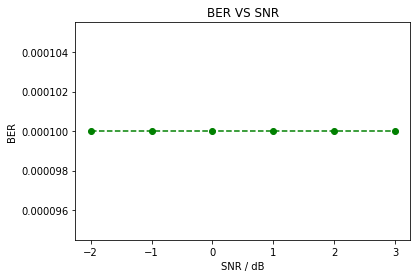

In [284]:
# 6. Graficar BER versus SNR.

# BER VS SNR
BER=np.array([BER_2, BER_1, BER0, BER1, BER2, BER3])
SNR=np.array([-2, -1, 0, 1, 2, 3])
plt.figure()
plt.plot(SNR, BER,'g--o') 
plt.title('BER VS SNR')
plt.xlabel('SNR / dB')
plt.ylabel('BER')
plt.savefig('img/BERvsSNR.png')
plt.show()

El BPSK, posee un mismo error, y un mismo BER, con una relación señal a ruido (SNR) desde -2 hasta 3 dB, para los 10000 bits transmitidos. 